In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Load the CSV file
df = pd.read_csv('nyc-rolling-sales.csv')

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], inplace=True)

# Rename columns for better readability
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.replace({' ': np.nan, ' -  ': np.nan, '0': np.nan}, inplace=True)


# Check for missing values
print("\nMissing values in the dataframe:")
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Convert columns to appropriate data types
df['sale_price'] = pd.to_numeric(df['sale_price'], errors='coerce')
df['gross_square_feet'] = pd.to_numeric(df['gross_square_feet'], errors='coerce')
df['land_square_feet'] = pd.to_numeric(df['land_square_feet'], errors='coerce')
df['year_built'] = pd.to_numeric(df['year_built'], errors='coerce')


df = df[df['year_built'] > 0]
df = df[df['sale_price'] >= 1000]

The Python code loads the dataset from a CSV file into a Pandas DataFrame and displays the first few rows for an initial inspection. It proceeds by dropping unnecessary columns and renaming the remaining columns to be more readable by converting them to lowercase and replacing spaces with underscores. The code then replaces certain placeholder values (like spaces and zeros) with NaN to identify missing data. It checks for and displays the count of missing values across columns and drops any rows with missing data to ensure data integrity. Following this, the script converts specific columns to appropriate numeric data types and filters the dataset to remove unrealistic or zero values in the 'year_built' and 'sale_price' columns. This preprocessing step ensures the dataset is clean and ready for further analysis or modeling.

In [43]:
# Function to create histograms
def plot_histogram(data, feature, bins, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=bins, kde=True)
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    

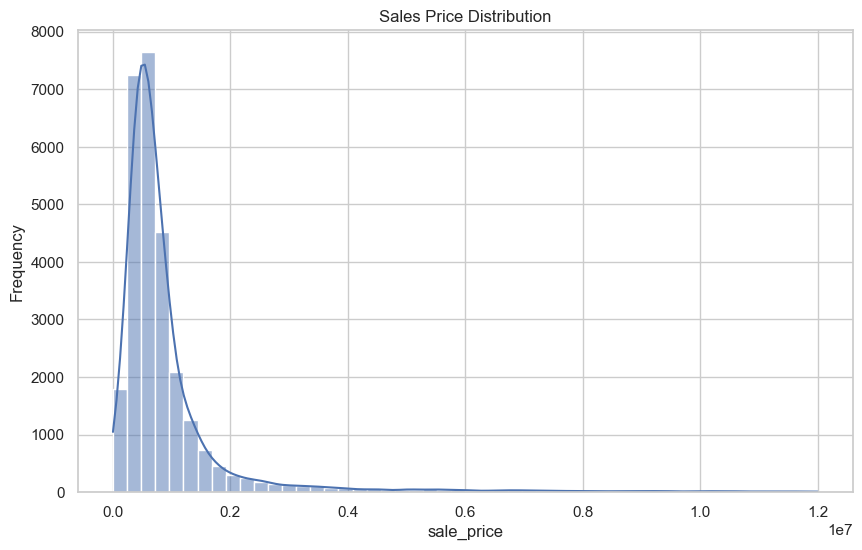

In [45]:
# Plotting histograms
min_value = min(df['sale_price'])
max_value = max(df['sale_price'])

num_bins = 50
bin_edges = np.linspace(min_value, max_value, num_bins + 1)  # num_bins + 1 to include both endpoints


plot_histogram(df, 'sale_price', bins=bin_edges, title='Sales Price Distribution')



The code and the corresponding histogram plot demonstrate the process of visualizing the distribution of sales prices in the dataset. The script calculates the minimum and maximum values of the 'sale_price' column to determine the range of the data. It then defines the number of bins for the histogram, in this case, 50, and creates an array of bin edges using np.linspace to ensure that the bins cover the entire range of sales prices. The plot_histogram function is called to generate and display the histogram, showing the frequency distribution of sales prices. The histogram reveals that the majority of sales prices are concentrated at the lower end of the price range, with a steep drop-off as prices increase, indicating a right-skewed distribution.

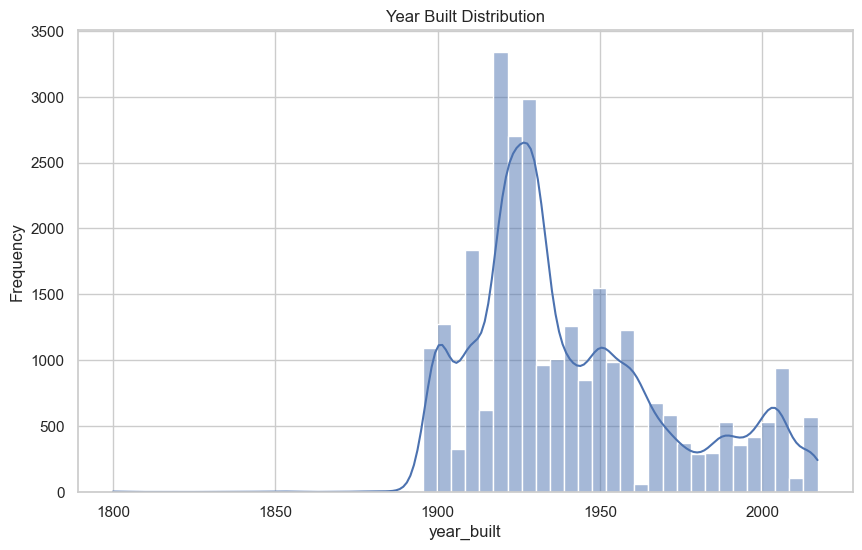

In [46]:
min_value = min(df['year_built'])
max_value = max(df['year_built'])

num_bins = 50
bin_edges = np.linspace(min_value, max_value, num_bins + 1)  # num_bins + 1 to include both endpoints

plot_histogram(df, 'year_built', bins=bin_edges, title='Year Built Distribution')



The histogram indicates several peaks, suggesting periods of high construction activity. Notably, there are significant spikes around the early 1900s and mid-20th century, reflecting historical construction booms. The frequency of new constructions decreases significantly after the 1970s, with minor fluctuations in more recent years. This distribution provides insights into the historical development trends within the dataset, highlighting key periods of urban development and expansion.

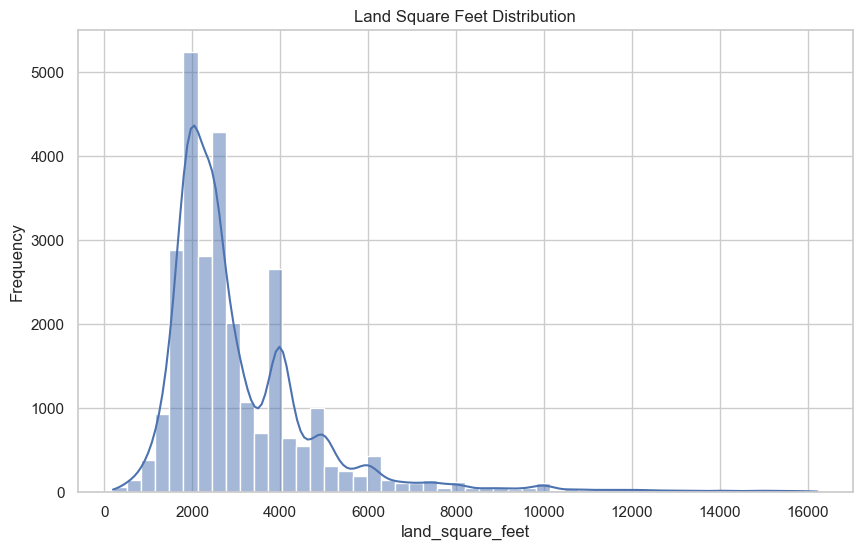

In [47]:
min_value = min(df['land_square_feet'])
max_value = max(df['land_square_feet'])

num_bins = 50
bin_edges = np.linspace(min_value, max_value, num_bins + 1)  # num_bins + 1 to include both endpoints

plot_histogram(df, 'land_square_feet', bins=bin_edges, title='Land Square Feet Distribution')



The histogram reveals that most properties have land sizes clustered around lower values, with a peak around 2000 square feet. There is a noticeable decline in frequency as the land size increases, with a few properties having significantly larger land areas. This distribution is right-skewed, similar to the sales price distribution, indicating that smaller land sizes are more common in the dataset. The visualization provides a clear understanding of the range and frequency of land sizes, which can be useful for further analysis and decision-making regarding property characteristics and trends.

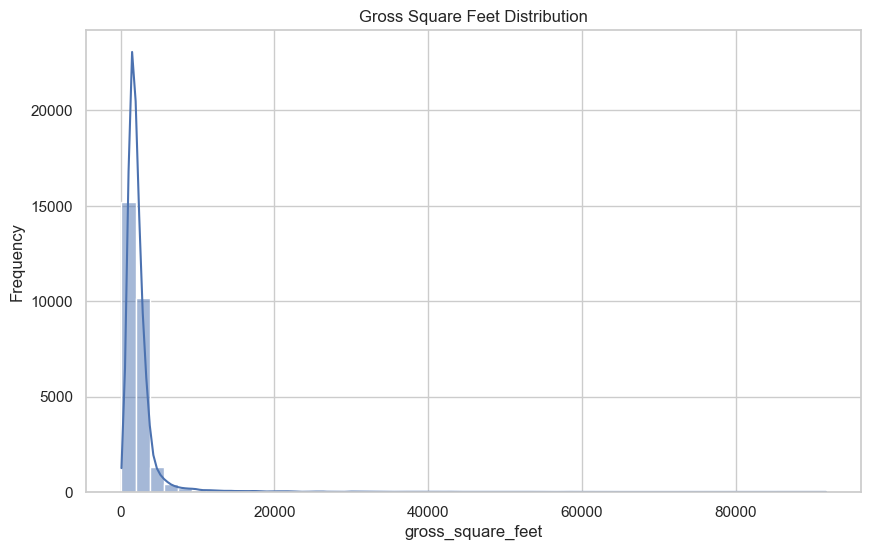

In [48]:
min_value = min(df['gross_square_feet'])
max_value = max(df['gross_square_feet'])

num_bins = 50
bin_edges = np.linspace(min_value, max_value, num_bins + 1)  # num_bins + 1 to include both endpoints
plot_histogram(df, 'gross_square_feet', bins=bin_edges, title='Gross Square Feet Distribution')

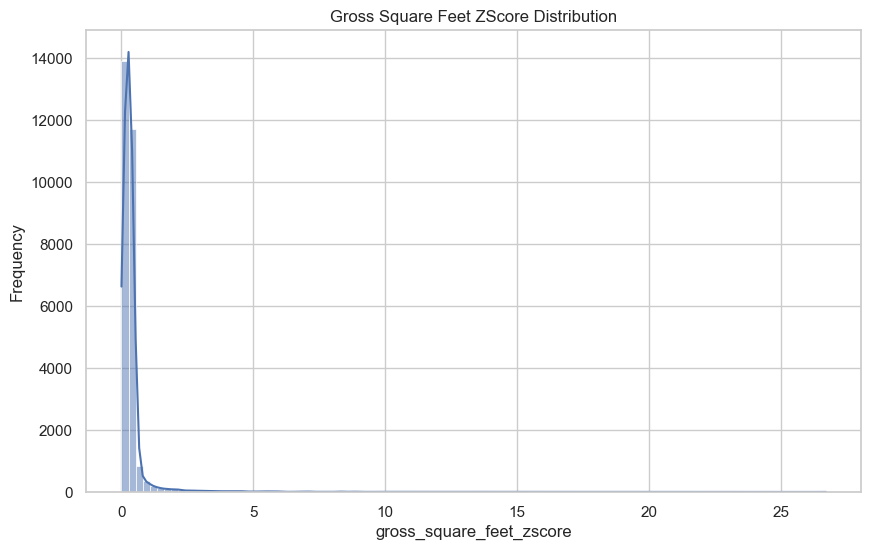

In [52]:
from scipy import stats

# Calculate the Z-scores
df['gross_square_feet_zscore'] = np.abs(stats.zscore(df['gross_square_feet']))

min_value = min(df['gross_square_feet_zscore'])
max_value = max(df['gross_square_feet_zscore'])

num_bins = 100
bin_edges = np.linspace(min_value, max_value, num_bins + 1)  # num_bins + 1 to include both endpoints
plot_histogram(df, 'gross_square_feet_zscore', bins=bin_edges, title='Gross Square Feet ZScore Distribution')

The histogram shows that most Z-scores are concentrated near zero, indicating that the majority of properties' gross square footage is close to the mean value. There are a few properties with higher Z-scores, reflecting those that deviate significantly from the mean, which are potential outliers. This distribution provides insights into the variability and potential anomalies within the 'gross_square_feet' data, which can be useful for identifying unusual properties or further refining the dataset. A threshold for the Z-score is set to 3, meaning any value with a Z-score greater than 3 will be considered an outlier. I determined this value according to the histogram above.

In [ ]:
# Define a threshold for the Z-score
zscore_threshold = 3

# Identify outliers
zscore_outliers = df[df['gross_square_feet_zscore'] > zscore_threshold]

import ace_tools_open as tools; tools.display_dataframe_to_user(name="Z-Score Outliers in gross_square", dataframe=zscore_outliers)
zscore_outliers

df = df[df['gross_square_feet_zscore'] <= zscore_threshold]

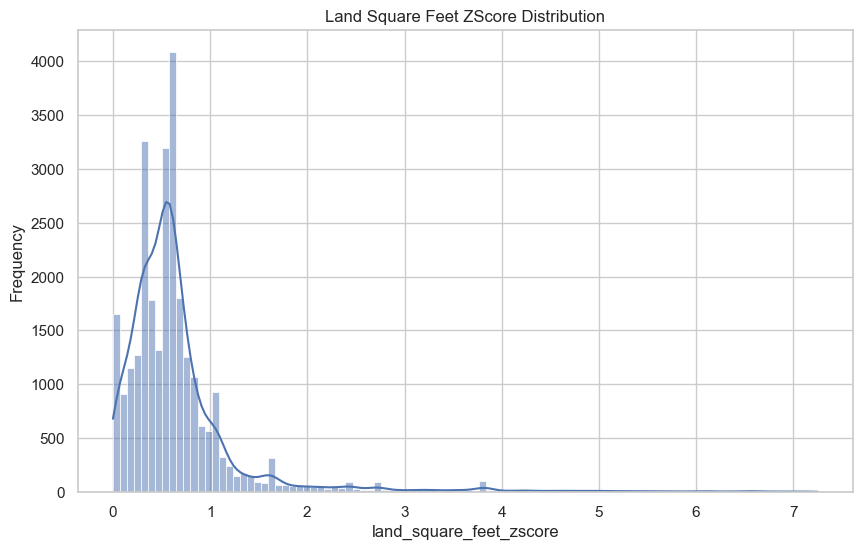

In [53]:
from scipy import stats

# Calculate the Z-scores
df['land_square_feet_zscore'] = np.abs(stats.zscore(df['land_square_feet']))

min_value = min(df['land_square_feet_zscore'])
max_value = max(df['land_square_feet_zscore'])

num_bins = 100
bin_edges = np.linspace(min_value, max_value, num_bins + 1)  # num_bins + 1 to include both endpoints
plot_histogram(df, 'land_square_feet_zscore', bins=bin_edges, title='Land Square Feet ZScore Distribution')


A threshold for the Z-score is set to 2.8, meaning any value with a Z-score greater than 2.8 will be considered an outlier. I determined this value according to the histogram above.

In [ ]:
# Define a threshold for the Z-score
zscore_threshold = 2.8

# Identify outliers
zscore_outliers = df[df['land_square_feet_zscore'] > zscore_threshold]

import ace_tools_open as tools; tools.display_dataframe_to_user(name="Z-Score Outliers in land_square_feet", dataframe=zscore_outliers)
zscore_outliers

df = df[df['land_square_feet_zscore'] <= zscore_threshold]

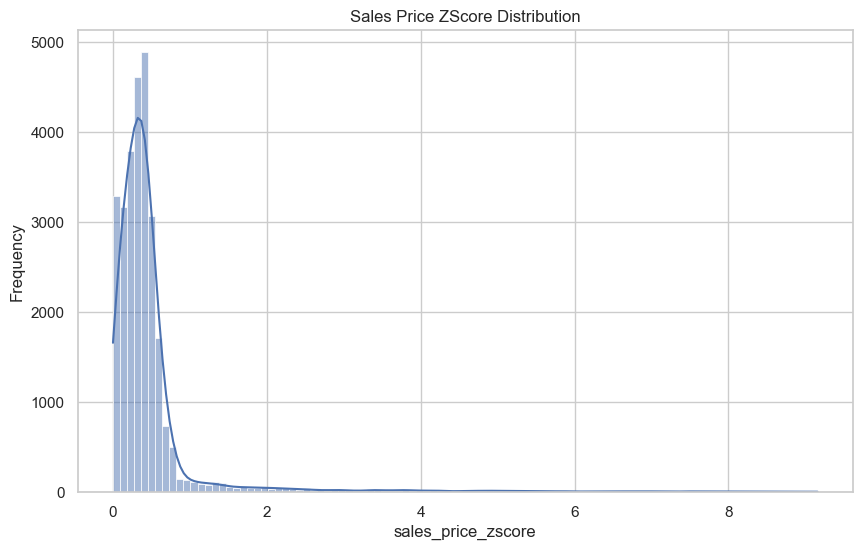

In [54]:
from scipy import stats

# Calculate the Z-scores
df['sales_price_zscore'] = np.abs(stats.zscore(df['sale_price']))

min_value = min(df['sales_price_zscore'])
max_value = max(df['sales_price_zscore'])

num_bins = 100
bin_edges = np.linspace(min_value, max_value, num_bins + 1)  # num_bins + 1 to include both endpoints
plot_histogram(df, 'sales_price_zscore', bins=bin_edges, title='Sales Price ZScore Distribution')


In [ ]:

# Define a threshold for the Z-score
zscore_threshold = 2.4

# Identify outliers
zscore_outliers = df[df['sales_price_zscore'] > zscore_threshold]

import ace_tools_open as tools; tools.display_dataframe_to_user(name="Z-Score Outliers in Sales Price", dataframe=zscore_outliers)
zscore_outliers

df = df[df['sales_price_zscore'] <= zscore_threshold]

In [37]:
# Drop rows with missing values after conversion
df.dropna(subset=['sale_price', 'gross_square_feet', 'land_square_feet', 'year_built'], inplace=True)

# Display the data types of the columns
print("\nData types of the columns:")
print(df.dtypes)

# Basic statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(df.describe())

# Count of unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("\nUnique value counts in categorical columns:")
for col in categorical_columns:
    print(f"{col}:")
    print(df[col].value_counts())





Data types of the columns:
borough                             int64
neighborhood                       object
building_class_category            object
tax_class_at_present               object
block                               int64
lot                                 int64
building_class_at_present          object
address                            object
zip_code                            int64
residential_units                   int64
commercial_units                    int64
total_units                         int64
land_square_feet                    int64
gross_square_feet                   int64
year_built                          int64
tax_class_at_time_of_sale           int64
building_class_at_time_of_sale     object
sale_price                          int64
sale_date                          object
gross_square_feet_zscore          float64
land_square_feet_zscore           float64
sales_price_zscore                float64
dtype: object

Statistical summary of numerical 

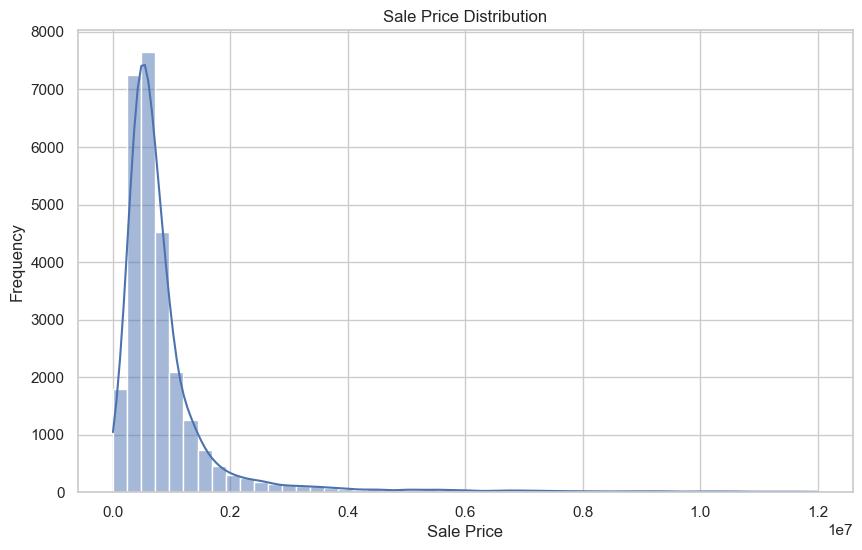

In [38]:
# Visualize the distribution of sale prices
plt.figure(figsize=(10, 6))
sns.histplot(df['sale_price'], bins=50, kde=True)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()



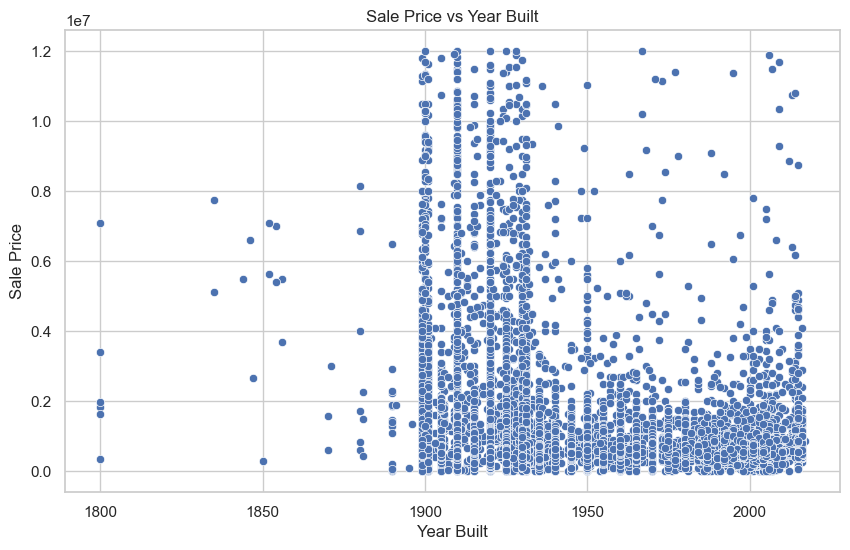

In [39]:
# Visualize the relationship between year built and sale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year_built', y='sale_price', data=df)
plt.title('Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()


The scatter plot illustrates the relationship between 'Sale Price' and 'Year Built' for properties in the dataset. The x-axis represents the year properties were built, while the y-axis shows the sale prices in scientific notation (1e7 corresponds to 10 million). Each point on the graph signifies a property, with its position determined by its construction year and sale price. The plot reveals several trends: a dense cluster of properties built between the late 1800s and early 1900s with varying sale prices, and a higher concentration of properties constructed after 1900. Notably, there are some high-value outliers scattered throughout the years, especially for properties built post-1950. Most sale prices are below 2 million, with fewer properties exceeding this value. The plot highlights the historical development trends and price distribution, providing insights into the real estate market over time.

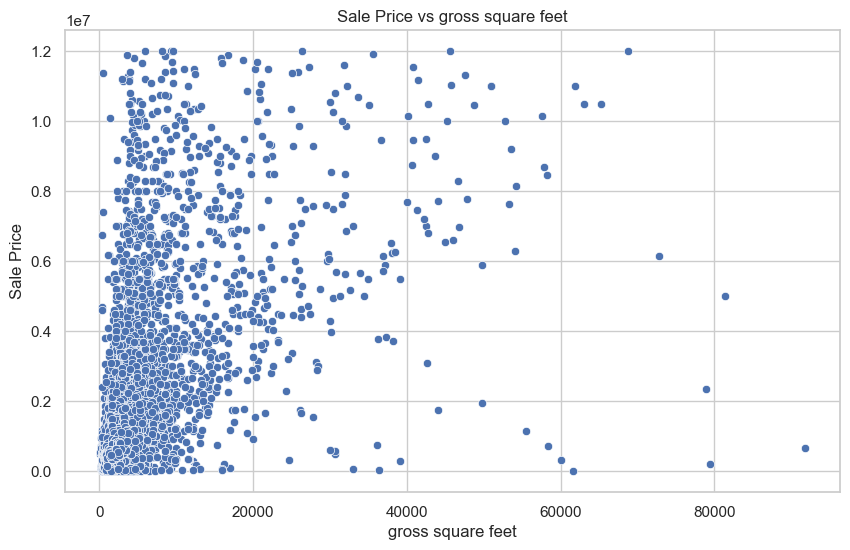

In [40]:
# Visualize the relationship between year built and sale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gross_square_feet', y='sale_price', data=df)
plt.title('Sale Price vs gross square feet')
plt.xlabel('gross square feet')
plt.ylabel('Sale Price')
plt.show()

The scatter plot illustrates the relationship between 'Sale Price' and 'Gross Square Feet' for properties in the dataset. The x-axis represents the gross square feet of properties, while the y-axis shows the sale prices in scientific notation (1e7 corresponds to 10 million). Each point on the graph represents a property, positioned according to its gross square feet and sale price. The plot reveals a dense cluster of properties with lower square feet (below 20,000 square feet) and sale prices predominantly below 2 million. There are fewer properties with larger square feet, but these tend to have a wider range of sale prices, including some very high-value outliers. The scatter plot shows a general trend that properties with larger square feet tend to have higher sale prices, although there is significant variability, particularly for properties with higher gross square feet. This visualization highlights the correlation between property size and sale price, while also indicating that other factors may influence the sale prices of larger properties.

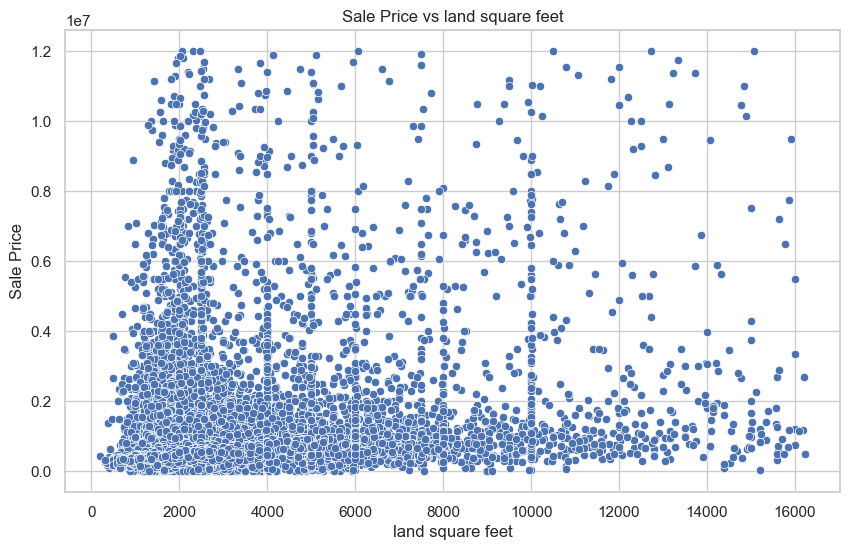

In [41]:
# Visualize the relationship between year built and sale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='land_square_feet', y='sale_price', data=df)
plt.title('Sale Price vs land square feet')
plt.xlabel('land square feet')
plt.ylabel('Sale Price')
plt.show()

The scatter plot depicts the relationship between 'Sale Price' and 'Land Square Feet' for properties in the dataset. The x-axis represents the land square feet of the properties, while the y-axis shows the sale prices in scientific notation (1e7 corresponds to 10 million). Each point on the graph represents an individual property, located according to its land size and sale price.

The plot reveals a high density of properties with land sizes below 5,000 square feet and sale prices predominantly below 2 million. As land square feet increases, the density of points decreases, and sale prices exhibit more variability. There are several high-value outliers with large land areas, indicating some properties with extensive land and high sale prices.

The general trend suggests that properties with larger land areas can have higher sale prices, although there is substantial variability in this relationship. The scatter plot highlights that while larger land size can correlate with higher sale prices, many properties with moderate land sizes also have high sale prices, indicating that other factors may influence the valuation. This visualization helps in understanding the distribution and correlation between land size and property prices in the dataset.

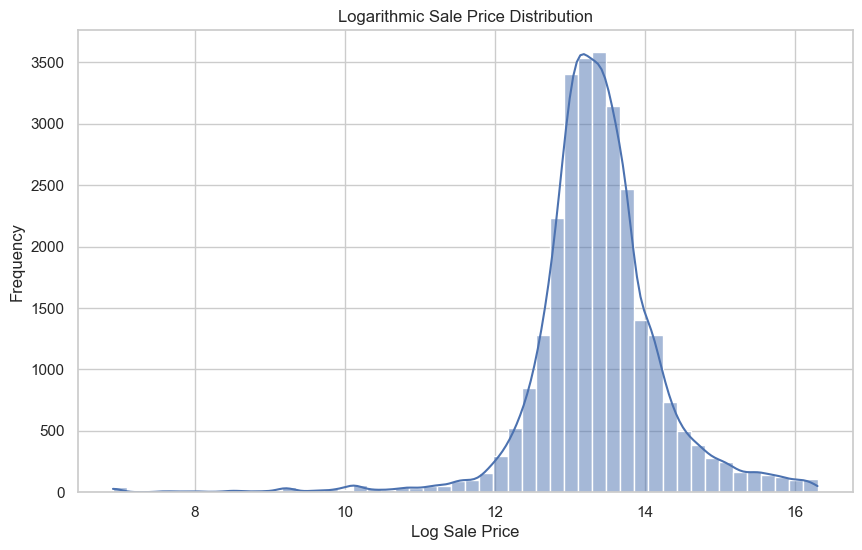

In [42]:

# Transform sale price using logarithm for better distribution
df['log_sale_price'] = np.log(df['sale_price'] + 1)

plt.figure(figsize=(10, 6))
sns.histplot(df['log_sale_price'], bins=50, kde=True)
plt.title('Logarithmic Sale Price Distribution')
plt.xlabel('Log Sale Price')
plt.ylabel('Frequency')
plt.show()

The histogram displays the distribution of the logarithm of sale prices for properties in the dataset. The x-axis represents the log-transformed sale prices, while the y-axis indicates the frequency of properties within each bin of these transformed values. The distribution is approximately normal, with a peak around a log sale price of 14, indicating that most sale prices, when log-transformed, cluster around this value. The symmetry of the distribution suggests that the log transformation has effectively normalized the data, reducing the right skew typically seen in raw sale prices. The majority of properties fall within the log sale price range of 12 to 15, with fewer properties at the extremes, highlighting that while most sale prices are concentrated around the mean, there are some high and low outliers. This log-transformed view provides a clearer and more statistically manageable representation of the sale price data. I used the Sale Price log scale for the regression model. Using log transformation in regression helps to meet the assumptions of linear regression, enhances interpretability, and can improve the overall model performance by addressing issues related to skewness, non-linearity, heteroscedasticity, and outliers.

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# read by default 1st sheet of an excel file
df = pd.read_excel('nyc-rolling-sales.xls')

# Rename columns for better readability
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.replace({' ': np.nan, ' -  ': np.nan, '0': np.nan}, inplace=True)

df.dropna(inplace=True)

# Convert columns to appropriate data types
df['sale_price'] = pd.to_numeric(df['sale_price'], errors='coerce')
df['price_per_unit'] = pd.to_numeric(df['price_per_unit'], errors='coerce')
df['square_ft_per_unit'] = pd.to_numeric(df['square_ft_per_unit'], errors='coerce')
df['year_built'] = pd.to_numeric(df['year_built'], errors='coerce')
df['sale_price_zscore_neighborhood'] = pd.to_numeric(df['sale_price_zscore_neighborhood'], errors='coerce')

df = df[df['year_built'] > 0]
df = df[df['sale_price'] >= 1000]




WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


The dataset is read from an Excel file into a Pandas DataFrame, and columns are renamed for better readability. Placeholder values representing missing data are replaced with NaN, and rows with any missing values are removed to ensure data integrity. Key columns are converted to numeric data types, with invalid entries set to NaN and subsequently dropped. The dataset is then filtered to exclude properties with unrealistic or zero values in the year_built column and those with a sale_price below 1000. This preprocessing ensures the dataset is clean, with appropriate data types and no missing or erroneous values, making it suitable for subsequent machine learning tasks such as scaling, splitting, and applying models like Support Vector Regression (SVR).

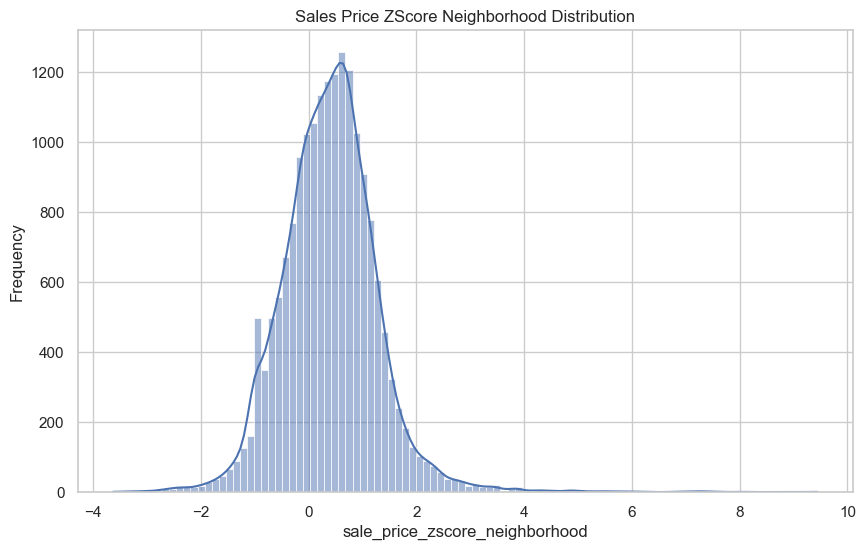

In [56]:

min_value = min(df['sale_price_zscore_neighborhood'])
max_value = max(df['sale_price_zscore_neighborhood'])

num_bins = 100
bin_edges = np.linspace(min_value, max_value, num_bins + 1)  # num_bins + 1 to include both endpoints
plot_histogram(df, 'sale_price_zscore_neighborhood', bins=bin_edges, title='Sales Price ZScore Neighborhood Distribution')



The histogram displays the distribution of sale price Z-scores for various neighborhoods, with the x-axis representing the Z-scores and the y-axis showing the frequency of properties for each Z-score bin. The distribution follows a roughly normal, bell-shaped curve centered around a Z-score of 0, indicating that most properties have sale prices close to the neighborhood average. The histogram is symmetric, suggesting an even distribution of sale prices around the neighborhood mean. A few outliers are visible with Z-scores less than -2 and greater than 3, reflecting properties with sale prices significantly lower or higher than the neighborhood average. This visualization effectively normalizes sale prices, providing a clear understanding of how prices vary within neighborhoods and highlighting significant deviations from the mean.

In [57]:

df = df[df['sale_price_zscore_neighborhood'] <= 3 ]
df = df[df['sale_price_zscore_neighborhood'] >= -2 ]

# Transform sale price using logarithm for better distribution
df['log_sale_price'] = np.log(df['sale_price'] + 1)

# Select independent variables and dependent variable
X = df[['year_built', 'price_per_unit', 'square_ft_per_unit', 'sale_price_zscore_neighborhood']]
y = df['log_sale_price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM model
svm_model = SVR(kernel='rbf')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [1, 2, 3, 4],  # 'cost'
    'gamma': [0.1, 0.01]
}

# Define the scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring=scoring, refit='r2', cv=5, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Results
results = pd.DataFrame(grid_search.cv_results_)

The code snippet demonstrates a comprehensive workflow for preparing a dataset and building an SVM model to predict real estate sale prices, incorporating data preprocessing, transformation, and hyperparameter tuning. Initially, the dataset is filtered to exclude outliers based on 'sale_price_zscore_neighborhood', and sale prices are log-transformed to achieve a better distribution. Key features ('year_built', 'price_per_unit', 'square_ft_per_unit', 'sale_price_zscore_neighborhood') are selected, and the data is split into training and testing sets. The features are then standardized using StandardScaler to ensure uniform scaling. An SVM model with an RBF kernel is defined, and a grid search with cross-validation is conducted to optimize the hyperparameters 'C' and 'gamma'. Custom scoring metrics, mean squared error (MSE) and R-squared (R2), are used to evaluate model performance. The best model is selected based on the highest R2 score, and the results are stored in a DataFrame for further analysis. This method ensures robust model tuning and accurate predictions of real estate sale prices.

Text(0, 0.5, 'Mean Squared Error (positive)')

<Figure size 1200x600 with 0 Axes>

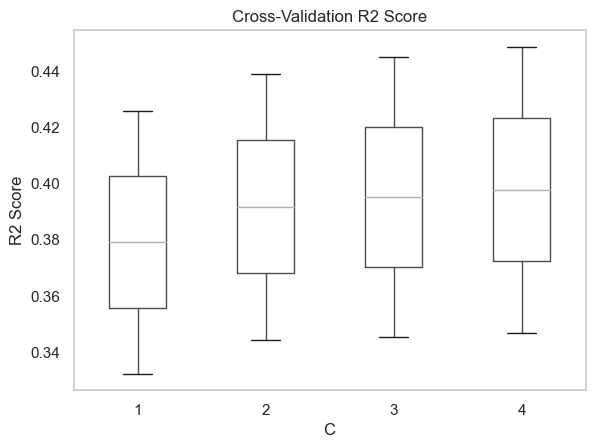

<Figure size 1200x600 with 0 Axes>

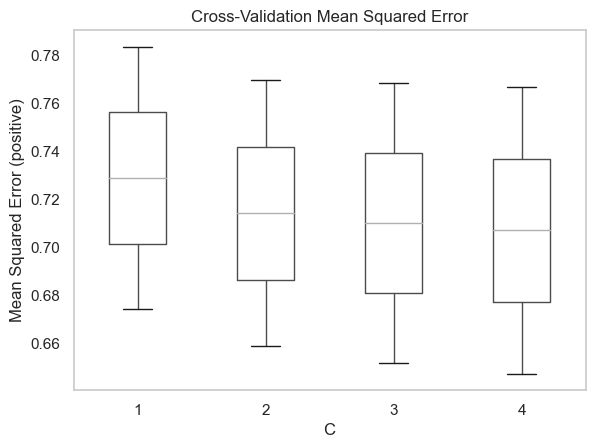

In [58]:
# Boxplot for R2 scores
plt.figure(figsize=(12, 6))
results.boxplot(column='mean_test_r2', by='param_C', grid=False)
plt.title('Cross-Validation R2 Score')
plt.suptitle('')
plt.xlabel('C')
plt.ylabel('R2 Score')

# Boxplot for mean squared error scores (convert to positive for easier interpretation)
plt.figure(figsize=(12, 6))
results['mean_test_mse_positive'] = -results['mean_test_mse']
results.boxplot(column='mean_test_mse_positive', by='param_C', grid=False)
plt.title('Cross-Validation Mean Squared Error')
plt.suptitle('')
plt.xlabel('C')
plt.ylabel('Mean Squared Error (positive)')

The provided boxplots illustrate the performance of an SVM model with different values of the regularization parameter 'C' during cross-validation. The top boxplot shows the distribution of the R2 scores, which measure the proportion of variance explained by the model, while the bottom boxplot displays the distribution of the mean squared error (MSE), which quantifies the average squared difference between observed and predicted values. Both metrics are evaluated across different 'C' values (1 to 4). The R2 scores show relatively consistent median values around 0.40 for each 'C' value, with some variation in the spread, indicating stable performance across different regularization strengths. Similarly, the MSE values remain around 0.72, with minor variations in dispersion, suggesting that changes in 'C' do not significantly impact the model's error rate. These plots help in visualizing the model's performance stability and the effect of regularization strength on predictive accuracy.

In [59]:
# Evaluate the model on the test set
y_pred = grid_search.predict(X_test_scaled)
test_score = r2_score(y_test, y_pred)
print(f"Test R2 score: {test_score}")

Test R2 score: 0.433786454507875


In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Define the MLPRegressor model
nn_model = MLPRegressor(max_iter=500, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,25), (100,100), (50, 50), (50, 100), (25, 50)],
    'alpha': [0.0001, 0.001, 0.01]
}

# Define the scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=nn_model, param_grid=param_grid, scoring=scoring, refit='r2', cv=5, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Results
results = pd.DataFrame(grid_search.cv_results_)



The code snippet demonstrates the application of a Multi-Layer Perceptron (MLP) Regressor for predicting real estate sale prices, incorporating hyperparameter tuning and cross-validation to optimize model performance. An MLPRegressor model is defined with a maximum of 500 iterations and a fixed random seed for reproducibility. A grid of hyperparameters, including different configurations for hidden layer sizes and regularization parameter values (alpha), is specified. Custom scoring metrics for mean squared error (MSE) and R-squared (R2) are used to evaluate model performance. GridSearchCV performs an exhaustive search over the hyperparameter grid with 5-fold cross-validation, selecting the best model based on the highest R-squared score. The model is trained on scaled training data, and the results of the grid search, including cross-validation scores and best hyperparameters, are stored in a DataFrame for further analysis. This approach ensures robust model tuning, leading to accurate predictions of real estate sale prices.

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, '(25, 50)'),
  Text(2, 0, '(50, 25)'),
  Text(3, 0, '(50, 50)'),
  Text(4, 0, '(50, 100)'),
  Text(5, 0, '(100, 100)')])

<Figure size 1200x600 with 0 Axes>

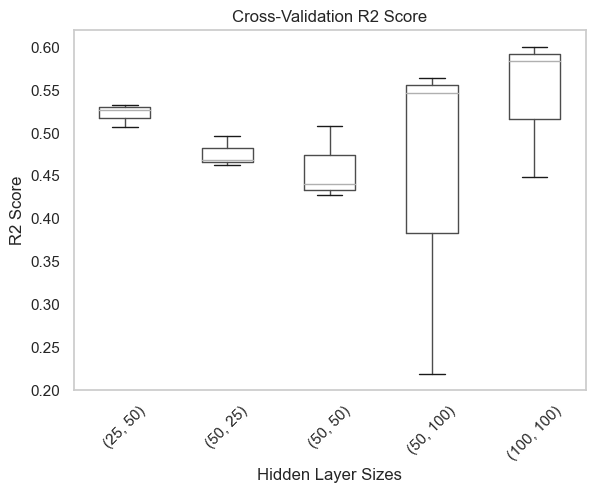

<Figure size 1200x600 with 0 Axes>

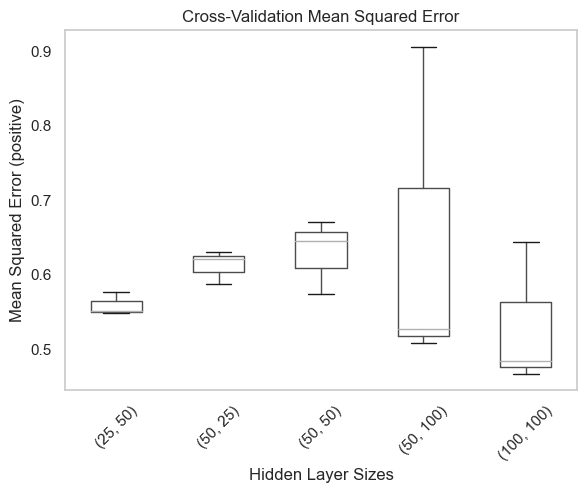

In [62]:
# Boxplot for R2 scores
plt.figure(figsize=(12, 6))
results.boxplot(column='mean_test_r2', by='param_hidden_layer_sizes', grid=False)
plt.title('Cross-Validation R2 Score')
plt.suptitle('')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)

# Boxplot for mean squared error scores (convert to positive for easier interpretation)
plt.figure(figsize=(12, 6))
results['mean_test_mse_positive'] = -results['mean_test_mse']
results.boxplot(column='mean_test_mse_positive', by='param_hidden_layer_sizes', grid=False)
plt.title('Cross-Validation Mean Squared Error')
plt.suptitle('')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Squared Error (positive)')
plt.xticks(rotation=45)

The boxplots illustrate the performance of the MLPRegressor model during cross-validation for various hidden layer configurations. The top boxplot, showing R2 scores, indicates that the (100, 100) configuration achieves the highest median R2 score, suggesting it explains the most variance in the data. Meanwhile, the (50, 100) configuration shows substantial variability with a wide range of R2 scores. The bottom boxplot, displaying mean squared error (MSE), reveals that the (100, 100) configuration also achieves the lowest median MSE, indicating the most accurate predictions. The (50, 100) configuration exhibits significant variability, with some folds resulting in much higher errors. Overall, these plots highlight that the (100, 100) hidden layer configuration offers the best balance between minimizing prediction error and maximizing explained variance, making it the most robust choice for the final model.

In [63]:
# Evaluate the model on the test set
y_pred = grid_search.predict(X_test_scaled)
test_score = r2_score(y_test, y_pred)
print(f"Test R2 score: {test_score}")

Test R2 score: 0.6161778203360316
